# SAMPLE PLOTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

plt.style.use('seaborn-v0_8-ticks')

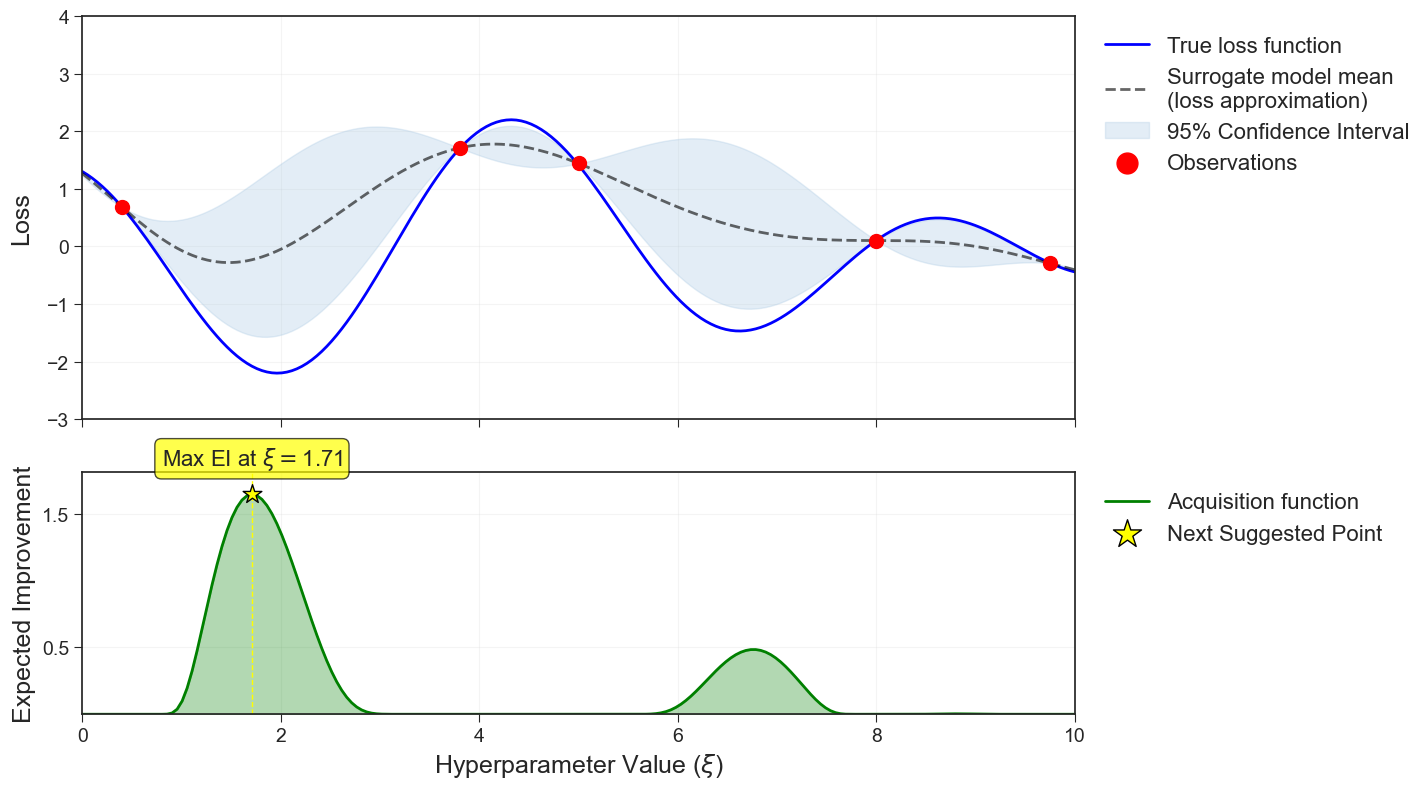

In [11]:
# Define the true objective function (non-convex)
def objective_function(x):
    return -np.sin(x) + 1.3 * np.cos(1.5*x)

# Generate some observed data points
np.random.seed(42)
X_observed = np.array([-0.1, 0.4, 3.8, 5.0, 8.0, 9.75, 10.1])  # Fixed positions for better visualization
n_observed = len(X_observed)
y_observed = objective_function(X_observed) + np.random.normal(0, 0.02, n_observed)

# Create points for prediction
X_pred = np.linspace(0, 10, 200)

# Fit Gaussian Process with proper kernel
kernel = 2.5 * RBF(length_scale=0.5, length_scale_bounds=(1e-6, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=1e-10)
gp.fit(X_observed.reshape(-1, 1), y_observed)

# Predict mean and variance
y_pred, y_std = gp.predict(X_pred.reshape(-1, 1), return_std=True)

# Calculate 95% confidence interval (use 2*std for better visualization)
y_upper = y_pred + 2 * y_std
y_lower = y_pred - 2 * y_std

# Define Expected Improvement function
def expected_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    X = X.reshape(-1, 1)
    mu, sigma = gpr.predict(X, return_std=True)
    
    # Best observed value so far
    mu_sample_opt = np.min(Y_sample)
    
    with np.errstate(divide='warn'):
        imp = mu_sample_opt - mu - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    
    return ei*10

# Calculate Expected Improvement
ei = expected_improvement(X_pred, X_observed, y_observed, gp)

# Find the next best point based on maximum EI
next_point_idx = np.argmax(ei)
next_point_x = X_pred[next_point_idx]
next_point_y = y_pred[next_point_idx]

# Create the visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, 
                               gridspec_kw={'height_ratios': [5, 3]})
# fig.suptitle('Bayesian Optimization Visualization', fontsize=16, fontweight='bold')

# Upper subplot: Loss function with observations and confidence interval
ax1.plot(X_pred, objective_function(X_pred), 'b', linewidth=2, label='True loss function')
ax1.plot(X_pred, y_pred, 'k--', linewidth=2, label=r'Surrogate model mean' +'\n(loss approximation)',  alpha=.6)
ax1.fill_between(X_pred, y_lower, y_upper, alpha=0.3, color='#a5c6e2', 
                 label='95% Confidence Interval')

ax1.scatter(X_observed, y_observed, c='red', s=100, marker='o', label='Observations', zorder=3)

ax1.set_ylabel('Loss', fontsize=18, labelpad=10)
# ax1.set_title('Objective Function with GP Surrogate', fontsize=14)
ax1.grid(True, alpha=0.2)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlim(0, 10)
ax1.set_ylim(-3, 4)

# Lower subplot: Expected Improvement
ax2.plot(X_pred, ei, 'g-', linewidth=2, label='Acquisition function')
ax2.fill_between(X_pred, 0, ei, alpha=0.3, color='g')
ax2.axvline(x=next_point_x, color='yellow', linestyle='--', linewidth=1)

ax2.scatter(next_point_x, ei[next_point_idx], c='yellow', s=200, marker='*', 
            edgecolors='black', label='Next Suggested Point', zorder=3)

ax2.set_xlabel(r'Hyperparameter Value ($\xi$)', fontsize=18)
ax2.set_ylabel('Expected Improvement', fontsize=18)
ax2.tick_params(axis='both', labelsize=14)
# ax2.set_title('Expected Improvement Function', fontsize=14)
ax2.grid(True, alpha=0.2)
ax2.set_xlim(0, 10)

yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::2])
ax2.set_ylim(0, (ei[next_point_idx])*1.1)

# Add text annotation for the next point
ax2.text(next_point_x, ei[next_point_idx]*1.1, fr'Max EI at $\xi=${next_point_x:.2f}', 
         horizontalalignment='center', verticalalignment='bottom', fontsize=16,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Place legends outside the plots on the right side
ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)

# Adjust the layout to make room for the legends
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Make room for legends on the right side

plt.savefig('./saved_plots/report_plots/SMBO_example.png', dpi=300, bbox_inches='tight')
# plt.show()

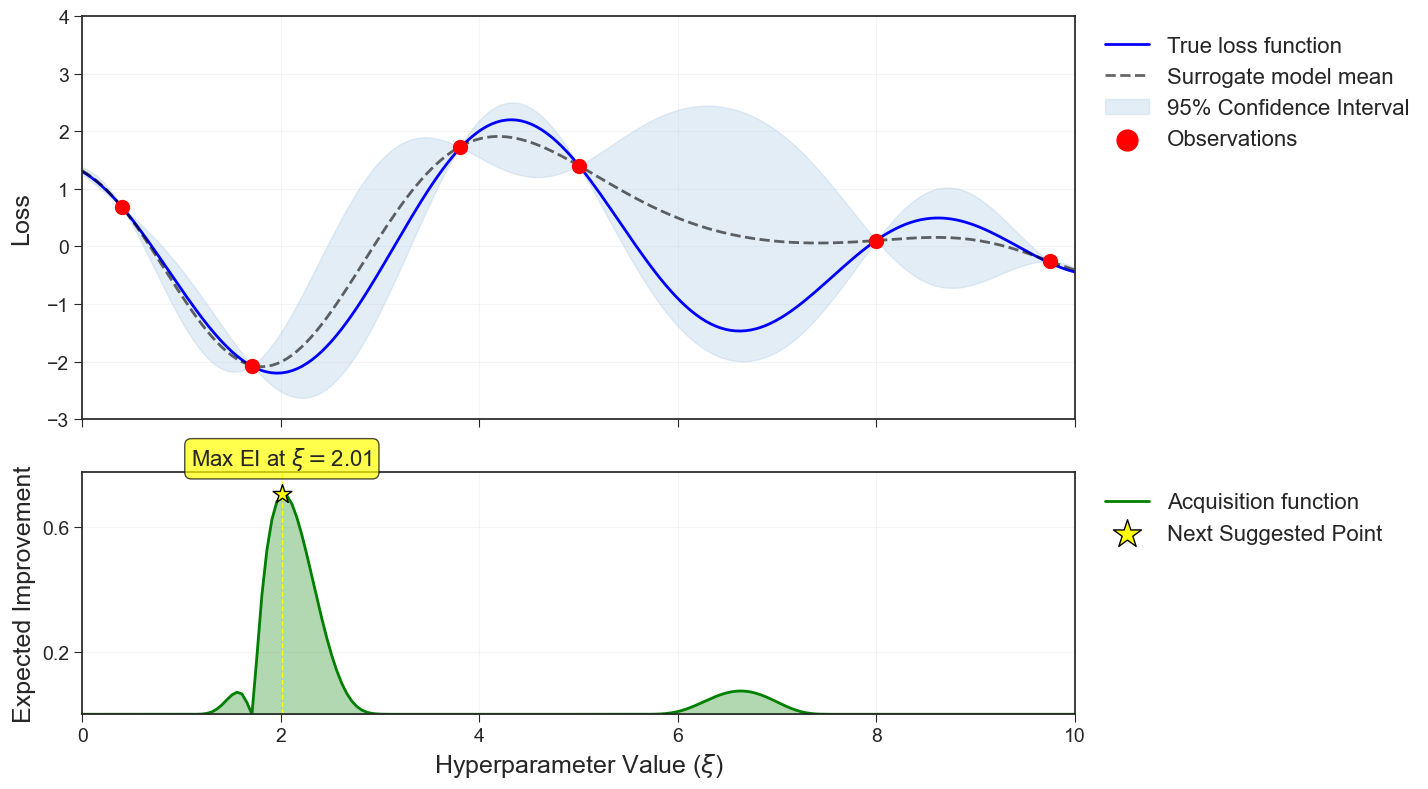

In [3]:
# Define the true objective function (non-convex)
def objective_function(x):
    return -np.sin(x) + 1.3 * np.cos(1.5*x)

# Generate some observed data points
np.random.seed(42)
X_observed = np.array([-0.1, 0.4, 1.71, 3.8, 5.0, 8.0, 9.75, 10.1])  # Fixed positions for better visualization
n_observed = len(X_observed)
y_observed = objective_function(X_observed) + np.random.normal(0, 0.02, n_observed)

# Create points for prediction
X_pred = np.linspace(0, 10, 200)

# Fit Gaussian Process with proper kernel
kernel = 2.5 * RBF(length_scale=0.5, length_scale_bounds=(1e-6, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=1e-10)
gp.fit(X_observed.reshape(-1, 1), y_observed)

# Predict mean and variance
y_pred, y_std = gp.predict(X_pred.reshape(-1, 1), return_std=True)

# Calculate 95% confidence interval (use 2*std for better visualization)
y_upper = y_pred + 2 * y_std
y_lower = y_pred - 2 * y_std

# Define Expected Improvement function
def expected_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    X = X.reshape(-1, 1)
    mu, sigma = gpr.predict(X, return_std=True)
    
    # Best observed value so far
    mu_sample_opt = np.min(Y_sample)
    
    with np.errstate(divide='warn'):
        imp = mu_sample_opt - mu - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    
    return ei*10

# Calculate Expected Improvement
ei = expected_improvement(X_pred, X_observed, y_observed, gp)

# Find the next best point based on maximum EI
next_point_idx = np.argmax(ei)
next_point_x = X_pred[next_point_idx]
next_point_y = y_pred[next_point_idx]

# Create the visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, 
                               gridspec_kw={'height_ratios': [5, 3]})
# fig.suptitle('Bayesian Optimization Visualization', fontsize=16, fontweight='bold')

# Upper subplot: Loss function with observations and confidence interval
ax1.plot(X_pred, objective_function(X_pred), 'b', linewidth=2, label='True loss function')
ax1.plot(X_pred, y_pred, 'k--', linewidth=2, label=r'Surrogate model mean',  alpha=.6)
ax1.fill_between(X_pred, y_lower, y_upper, alpha=0.3, color='#a5c6e2', 
                 label='95% Confidence Interval')

ax1.scatter(X_observed, y_observed, c='red', s=100, marker='o', label='Observations', zorder=3)

ax1.set_ylabel('Loss', fontsize=18, labelpad=10)
# ax1.set_title('Objective Function with GP Surrogate', fontsize=14)
ax1.grid(True, alpha=0.2)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlim(0, 10)
ax1.set_ylim(-3, 4)

# Lower subplot: Expected Improvement
ax2.plot(X_pred, ei, 'g-', linewidth=2, label='Acquisition function')
ax2.fill_between(X_pred, 0, ei, alpha=0.3, color='g')
ax2.axvline(x=next_point_x, color='yellow', linestyle='--', linewidth=1)

ax2.scatter(next_point_x, ei[next_point_idx], c='yellow', s=200, marker='*', 
            edgecolors='black', label='Next Suggested Point', zorder=3)

ax2.set_xlabel(r'Hyperparameter Value ($\xi$)', fontsize=18)
ax2.set_ylabel('Expected Improvement', fontsize=18)
ax2.tick_params(axis='both', labelsize=14)
# ax2.set_title('Expected Improvement Function', fontsize=14)
ax2.grid(True, alpha=0.2)
ax2.set_xlim(0, 10)

yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::2])
ax2.set_ylim(0, (ei[next_point_idx])*1.1)

# Add text annotation for the next point
ax2.text(next_point_x, ei[next_point_idx]*1.1, fr'Max EI at $\xi=${next_point_x:.2f}', 
         horizontalalignment='center', verticalalignment='bottom', fontsize=16,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Place legends outside the plots on the right side
ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)

# Adjust the layout to make room for the legends
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Make room for legends on the right side

plt.savefig('./saved_plots/report_plots/SMBO_example.png', dpi=300, bbox_inches='tight')
# plt.show()

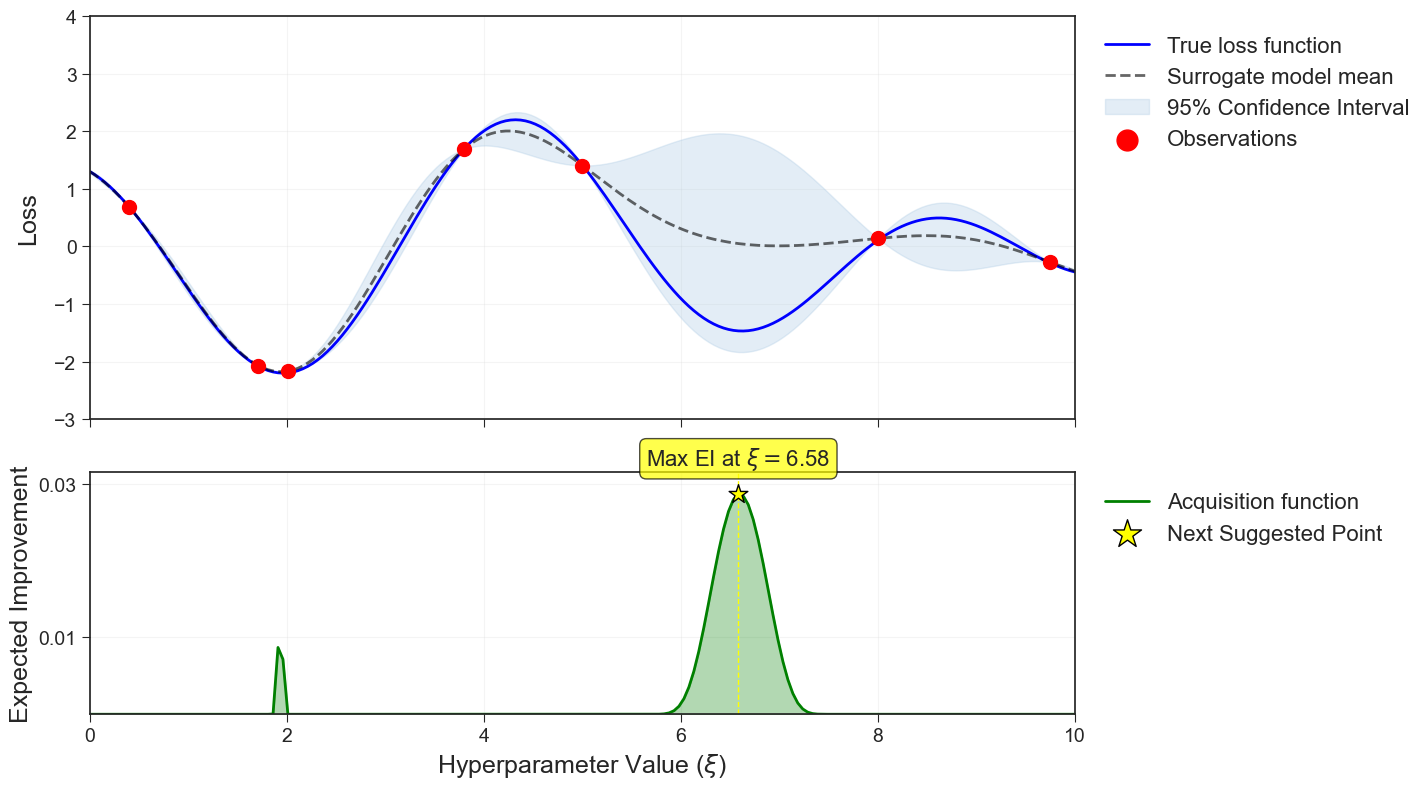

In [5]:
# Define the true objective function (non-convex)
def objective_function(x):
    return -np.sin(x) + 1.3 * np.cos(1.5*x)

# Generate some observed data points
np.random.seed(42)
X_observed = np.array([-0.1, 0.4, 1.71, 2.01, 3.8, 5.0, 8.0, 9.75, 10.1])  # Fixed positions for better visualization
n_observed = len(X_observed)
y_observed = objective_function(X_observed) + np.random.normal(0, 0.02, n_observed)

# Create points for prediction
X_pred = np.linspace(0, 10, 200)

# Fit Gaussian Process with proper kernel
kernel = 2.5 * RBF(length_scale=0.5, length_scale_bounds=(1e-6, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=1e-10)
gp.fit(X_observed.reshape(-1, 1), y_observed)

# Predict mean and variance
y_pred, y_std = gp.predict(X_pred.reshape(-1, 1), return_std=True)

# Calculate 95% confidence interval (use 2*std for better visualization)
y_upper = y_pred + 2 * y_std
y_lower = y_pred - 2 * y_std

# Define Expected Improvement function
def expected_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    X = X.reshape(-1, 1)
    mu, sigma = gpr.predict(X, return_std=True)
    
    # Best observed value so far
    mu_sample_opt = np.min(Y_sample)
    
    with np.errstate(divide='warn'):
        imp = mu_sample_opt - mu - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    
    return ei*10

# Calculate Expected Improvement
ei = expected_improvement(X_pred, X_observed, y_observed, gp)

# Find the next best point based on maximum EI
next_point_idx = np.argmax(ei)
next_point_x = X_pred[next_point_idx]
next_point_y = y_pred[next_point_idx]

# Create the visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, 
                               gridspec_kw={'height_ratios': [5, 3]})
# fig.suptitle('Bayesian Optimization Visualization', fontsize=16, fontweight='bold')

# Upper subplot: Loss function with observations and confidence interval
ax1.plot(X_pred, objective_function(X_pred), 'b', linewidth=2, label='True loss function')
ax1.plot(X_pred, y_pred, 'k--', linewidth=2, label=r'Surrogate model mean',  alpha=.6)
ax1.fill_between(X_pred, y_lower, y_upper, alpha=0.3, color='#a5c6e2', 
                 label='95% Confidence Interval')

ax1.scatter(X_observed, y_observed, c='red', s=100, marker='o', label='Observations', zorder=3)

ax1.set_ylabel('Loss', fontsize=18, labelpad=10)
# ax1.set_title('Objective Function with GP Surrogate', fontsize=14)
ax1.grid(True, alpha=0.2)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlim(0, 10)
ax1.set_ylim(-3, 4)

# Lower subplot: Expected Improvement
ax2.plot(X_pred, ei, 'g-', linewidth=2, label='Acquisition function')
ax2.fill_between(X_pred, 0, ei, alpha=0.3, color='g')
ax2.axvline(x=next_point_x, color='yellow', linestyle='--', linewidth=1)

ax2.scatter(next_point_x, ei[next_point_idx], c='yellow', s=200, marker='*', 
            edgecolors='black', label='Next Suggested Point', zorder=3)

ax2.set_xlabel(r'Hyperparameter Value ($\xi$)', fontsize=18)
ax2.set_ylabel('Expected Improvement', fontsize=18)
ax2.tick_params(axis='both', labelsize=14)
# ax2.set_title('Expected Improvement Function', fontsize=14)
ax2.grid(True, alpha=0.2)
ax2.set_xlim(0, 10)

yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::2])
ax2.set_ylim(0, (ei[next_point_idx])*1.1)

# Add text annotation for the next point
ax2.text(next_point_x, ei[next_point_idx]*1.1, fr'Max EI at $\xi=${next_point_x:.2f}', 
         horizontalalignment='center', verticalalignment='bottom', fontsize=16,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Place legends outside the plots on the right side
ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)

# Adjust the layout to make room for the legends
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Make room for legends on the right side

plt.savefig('./saved_plots/report_plots/SMBO_example.png', dpi=300, bbox_inches='tight')
# plt.show()

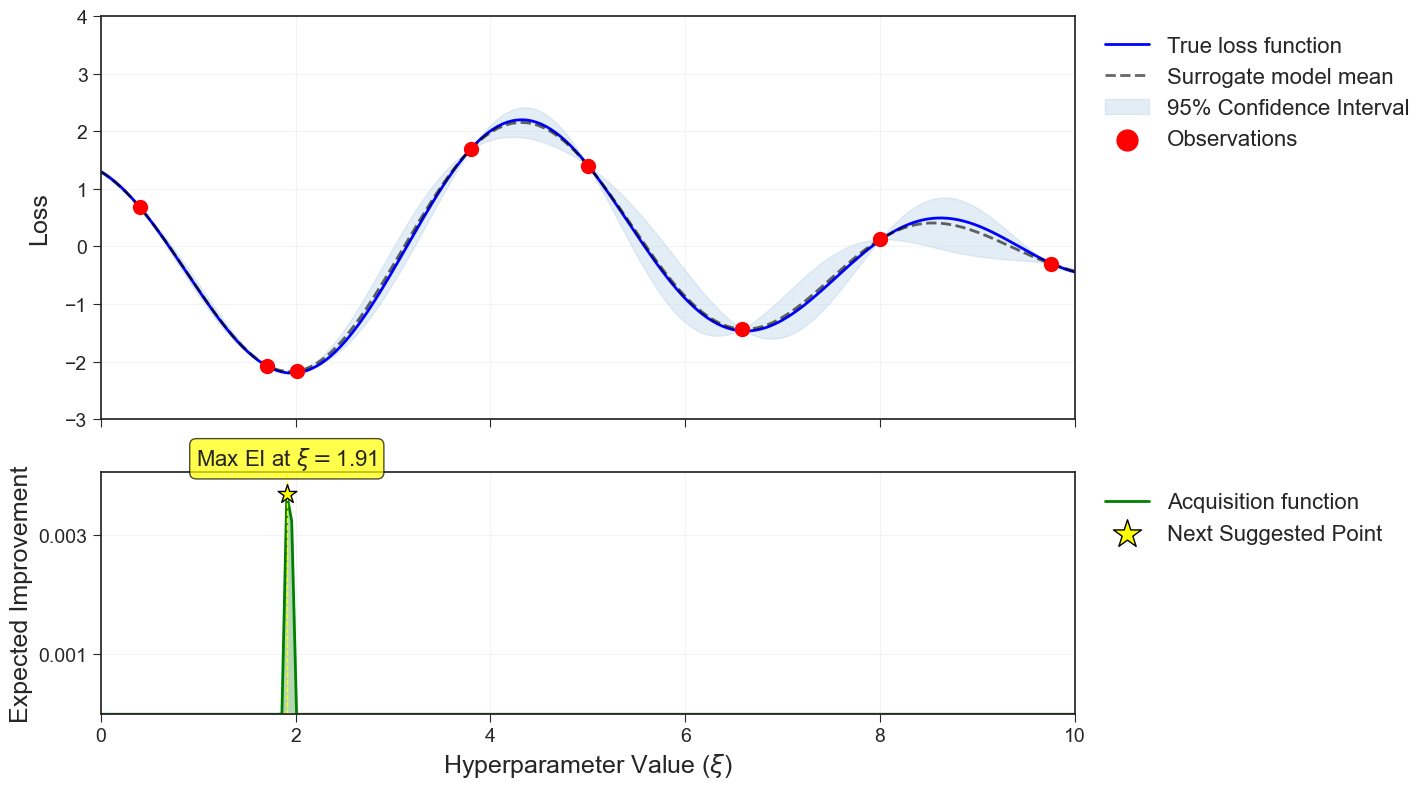

In [6]:
# Define the true objective function (non-convex)
def objective_function(x):
    return -np.sin(x) + 1.3 * np.cos(1.5*x)

# Generate some observed data points
np.random.seed(42)
X_observed = np.array([-0.1, 0.4, 1.71, 2.01, 3.8, 5.0, 6.58, 8.0, 9.75, 10.1])  # Fixed positions for better visualization
n_observed = len(X_observed)
y_observed = objective_function(X_observed) + np.random.normal(0, 0.02, n_observed)

# Create points for prediction
X_pred = np.linspace(0, 10, 200)

# Fit Gaussian Process with proper kernel
kernel = 2.5 * RBF(length_scale=0.5, length_scale_bounds=(1e-6, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=1e-10)
gp.fit(X_observed.reshape(-1, 1), y_observed)

# Predict mean and variance
y_pred, y_std = gp.predict(X_pred.reshape(-1, 1), return_std=True)

# Calculate 95% confidence interval (use 2*std for better visualization)
y_upper = y_pred + 2 * y_std
y_lower = y_pred - 2 * y_std

# Define Expected Improvement function
def expected_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    X = X.reshape(-1, 1)
    mu, sigma = gpr.predict(X, return_std=True)
    
    # Best observed value so far
    mu_sample_opt = np.min(Y_sample)
    
    with np.errstate(divide='warn'):
        imp = mu_sample_opt - mu - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    
    return ei*10

# Calculate Expected Improvement
ei = expected_improvement(X_pred, X_observed, y_observed, gp)

# Find the next best point based on maximum EI
next_point_idx = np.argmax(ei)
next_point_x = X_pred[next_point_idx]
next_point_y = y_pred[next_point_idx]

# Create the visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, 
                               gridspec_kw={'height_ratios': [5, 3]})
# fig.suptitle('Bayesian Optimization Visualization', fontsize=16, fontweight='bold')

# Upper subplot: Loss function with observations and confidence interval
ax1.plot(X_pred, objective_function(X_pred), 'b', linewidth=2, label='True loss function')
ax1.plot(X_pred, y_pred, 'k--', linewidth=2, label=r'Surrogate model mean',  alpha=.6)
ax1.fill_between(X_pred, y_lower, y_upper, alpha=0.3, color='#a5c6e2', 
                 label='95% Confidence Interval')

ax1.scatter(X_observed, y_observed, c='red', s=100, marker='o', label='Observations', zorder=3)

ax1.set_ylabel('Loss', fontsize=18, labelpad=10)
# ax1.set_title('Objective Function with GP Surrogate', fontsize=14)
ax1.grid(True, alpha=0.2)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlim(0, 10)
ax1.set_ylim(-3, 4)

# Lower subplot: Expected Improvement
ax2.plot(X_pred, ei, 'g-', linewidth=2, label='Acquisition function')
ax2.fill_between(X_pred, 0, ei, alpha=0.3, color='g')
ax2.axvline(x=next_point_x, color='yellow', linestyle='--', linewidth=1)

ax2.scatter(next_point_x, ei[next_point_idx], c='yellow', s=200, marker='*', 
            edgecolors='black', label='Next Suggested Point', zorder=3)

ax2.set_xlabel(r'Hyperparameter Value ($\xi$)', fontsize=18)
ax2.set_ylabel('Expected Improvement', fontsize=18)
ax2.tick_params(axis='both', labelsize=14)
# ax2.set_title('Expected Improvement Function', fontsize=14)
ax2.grid(True, alpha=0.2)
ax2.set_xlim(0, 10)

yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::2])
ax2.set_ylim(0, (ei[next_point_idx])*1.1)

# Add text annotation for the next point
ax2.text(next_point_x, ei[next_point_idx]*1.1, fr'Max EI at $\xi=${next_point_x:.2f}', 
         horizontalalignment='center', verticalalignment='bottom', fontsize=16,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Place legends outside the plots on the right side
ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16, markerscale=1.5)

# Adjust the layout to make room for the legends
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Make room for legends on the right side

plt.savefig('./saved_plots/report_plots/SMBO_example.png', dpi=300, bbox_inches='tight')
# plt.show()